In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [2]:

#Quality of wine is rated from 1-10 as 10 being the highiest 

wine_red = pd.read_csv('winequality-red.csv')

wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


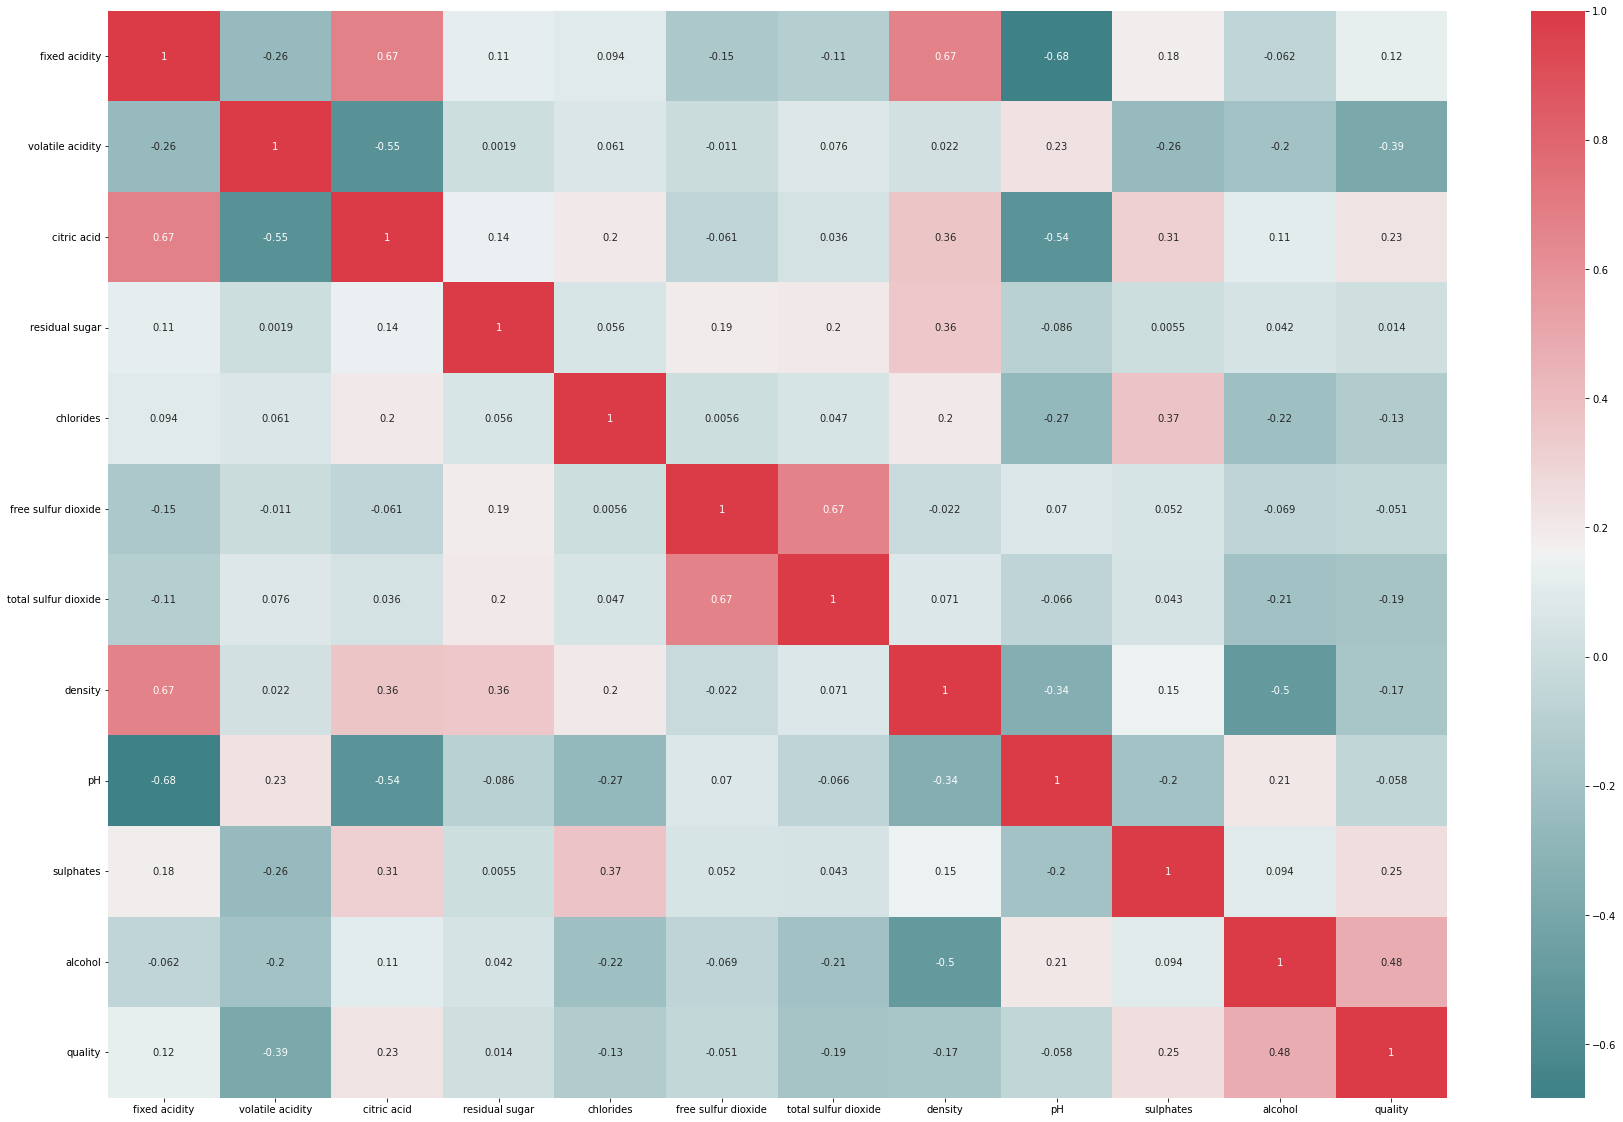

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
corr = wine_red.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

In [4]:
#Alcohol content  has the strongest correlation with Quality of Wine

In [5]:
#Goal is Top 3 important properties can classify wines into Great or Regualar  labels.

In [6]:
#have all of their values between 0 and 1. In contrast, 
#total sulfur dioxide has some values over 100 and some values below 10. 
#This disparity in ranges may cause a problem since a small change in a feature might not affect the other. To address this problem, 
#I normalize the ranges of the dataset to a uniform range between 0 and 1




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_wine = scaler.fit_transform(wine_red)
normal_wine = pd.DataFrame(normal_wine, columns = wine_red.columns)
print(normal_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [7]:
#I create a new column named “best wine” in the original dataset df. “Good wine” equals “yes” when the quality is equal or above 7. “Good wine” equals “no” when the quality is less than 7. 
#Classification models will finally output “yes” or “no” to predict wine quality.

wine_red["best_red"] = ["yes" if i > 6 else "no" for i in wine_red['quality']]

In [8]:
#Features are all the features besides quality 
# and Y is are new dateset with the best red with quality 8 and above. 



X = normal_wine.drop(["quality"], axis = 1)
y = wine_red["best_red"]

In [9]:
y.value_counts()

no     1382
yes     217
Name: best_red, dtype: int64

C:\Users\brand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


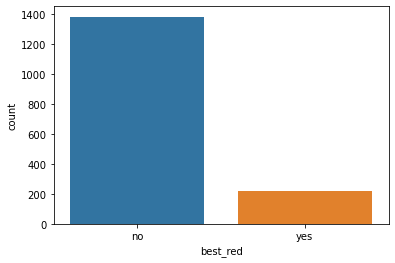

In [10]:
#Visualize the count 

sns.countplot(y)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=2020)

In [15]:

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [16]:
random_forest = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
random_forest.set_index("feature", inplace=True)
random_forest.sort_values(by = "importance", ascending = False, inplace = True)
random_forest.head()

,importance
feature,
alcohol,0.173620
volatile acidity,0.120091
sulphates,0.106653
density,0.097363
total sulfur dioxide,0.090359


In [17]:
#the top 3 important properties are alcohol, volatile acidity, and sulphates

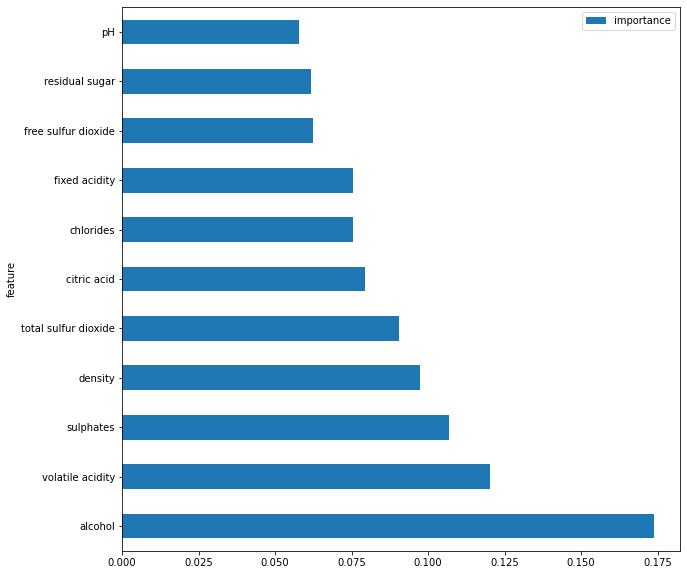

In [18]:
random_forest.plot.barh(figsize=(10,10))
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=2020)

In [32]:
y_pred_goodwine = rf_model.predict(X_test)
acc_rf = accuracy_score(Y_test,y_pred_goodwine)
print('Accuracy = ', acc_rf)

Accuracy =  0.8895833333333333


In [33]:
#Classification report 

In [21]:
print(np.average(wine_red[wine_red["best_red"] == "yes"].alcohol))
print(np.average(wine_red[wine_red["best_red"] == "no"].alcohol))

11.518049155161291
10.251037144232994


In [22]:
#Wine with good quality has higher levels of alcohol on average

In [23]:
print(np.average(wine_red[wine_red["best_red"] == "yes"].sulphates))
print(np.average(wine_red[wine_red["best_red"] == "no"].sulphates))

0.7434562211981566
0.6447539797395079


In [24]:
#best red wine tends to have higher sulphates in it

In [25]:
df_amazing = wine_red[wine_red["best_red"] == "yes"]
df_nasty = wine_red[wine_red["best_red"] == "no"]
print(np.average(df_amazing["volatile acidity"]))
print(np.average(df_nasty["volatile acidity"]))

0.4055299539170507
0.5470224312590448


In [ ]:
# best red wines tend to have lower volatile acidity 